In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
train_data= pd.read_csv('/content/drive/MyDrive/Kaggle competition /titanic/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/Kaggle competition /titanic/test.csv')
submission_data=pd.read_csv('/content/drive/MyDrive/Kaggle competition /titanic/gender_submission.csv')

In [300]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [301]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [302]:
submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Work with Train data

In [303]:
train=train_data

In [304]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [305]:
Y=train['Survived']

In [306]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [307]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [308]:
train=train.drop(['Cabin','PassengerId','Survived','Name','Ticket'],axis=1)

In [309]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [310]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


<Axes: xlabel='Age', ylabel='Count'>

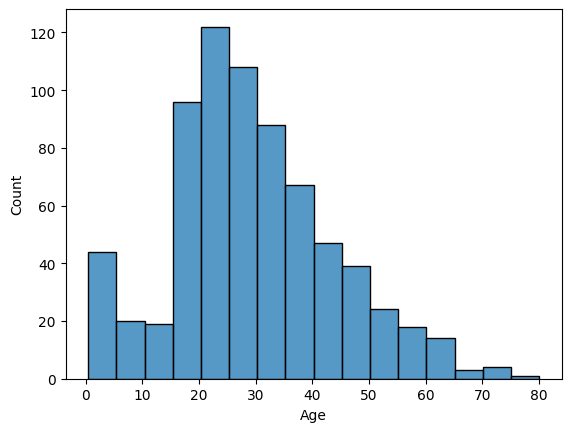

In [311]:
sns.histplot(train['Age'],bins=16)

In [312]:
train['Age']=train['Age'].fillna(train['Age'].mean())

In [313]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [314]:
train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [315]:
train=pd.get_dummies(train,columns=['Sex','Embarked'])

In [316]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,Y,train_size=0.8,random_state=0)

In [317]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
140,3,29.699118,0,2,15.2458,1,0,1,0,0
439,2,31.000000,0,0,10.5000,0,1,0,0,1
817,2,31.000000,1,1,37.0042,0,1,1,0,0
378,3,20.000000,0,0,4.0125,0,1,1,0,0
491,3,21.000000,0,0,7.2500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
835,1,39.000000,1,1,83.1583,1,0,1,0,0
192,3,19.000000,1,0,7.8542,1,0,0,0,1
629,3,29.699118,0,0,7.7333,0,1,0,1,0
559,3,36.000000,1,0,17.4000,1,0,0,0,1


In [318]:
from sklearn.metrics import accuracy_score

In [319]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)  # Train the classifier
    accuracy=clf.score(x_test,y_test)
    print(f"{name}: Accuracy = {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.7989
Decision Tree: Accuracy = 0.7709
Random Forest: Accuracy = 0.8380
Gradient Boosting: Accuracy = 0.8380
SVM: Accuracy = 0.7207
KNN: Accuracy = 0.7263
Naive Bayes: Accuracy = 0.7989


# Test Data

In [320]:
test=test_data

In [321]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [322]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [323]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [324]:
test=test.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)

In [325]:
test['Age']=test['Age'].fillna(test['Age'].mean())
test=pd.get_dummies(test,columns=['Sex','Embarked'])

In [326]:
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [327]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,0,1,0,1,0
1,3,47.00000,1,0,7.0000,1,0,0,0,1
2,2,62.00000,0,0,9.6875,0,1,0,1,0
3,3,27.00000,0,0,8.6625,0,1,0,0,1
4,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,1,0,0,1
414,1,39.00000,0,0,108.9000,1,0,1,0,0
415,3,38.50000,0,0,7.2500,0,1,0,0,1
416,3,30.27259,0,0,8.0500,0,1,0,0,1


In [328]:
rf=RandomForestClassifier()
rf.fit(train,Y)
y_pred=rf.predict(test)

In [329]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [330]:
submission_data['Survived']=y_pred

In [331]:
submission_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [332]:
submission_data.to_csv('submit_1.csv',index=False)          #0.75837

# Try with neural network(ann)

In [333]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [334]:
model=Sequential()

In [335]:
model.add(Dense(1000, activation='relu',input_dim=10))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [336]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 1000)              11000     
                                                                 
 dense_59 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_60 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_61 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 2014001 (7.68 MB)
Trainable params: 2014001 (7.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [337]:
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(
    monitor='val_loss'
)
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [338]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [339]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
23/23 [==============================] - 3s 50ms/step - loss: 1.1019 - accuracy: 0.6194 - val_loss: 0.5689 - val_accuracy: 0.7207
Epoch 2/3500
23/23 [==============================] - 1s 59ms/step - loss: 0.6261 - accuracy: 0.6699 - val_loss: 0.6525 - val_accuracy: 0.6145
Epoch 3/3500
23/23 [==============================] - 1s 49ms/step - loss: 0.6230 - accuracy: 0.6587 - val_loss: 0.6436 - val_accuracy: 0.6145
Epoch 4/3500
23/23 [==============================] - 1s 56ms/step - loss: 0.6055 - accuracy: 0.6657 - val_loss: 0.5184 - val_accuracy: 0.7318
Epoch 5/3500
23/23 [==============================] - 1s 52ms/step - loss: 0.5925 - accuracy: 0.6812 - val_loss: 0.4932 - val_accuracy: 0.7486
Epoch 6/3500
23/23 [==============================] - 1s 41ms/step - loss: 0.5550 - accuracy: 0.7261 - val_loss: 0.4925 - val_accuracy: 0.7542
Epoch 7/3500
23/23 [==============================] - 1s 41ms/step - loss: 0.5192 - accuracy: 0.7598 - val_loss: 0.4814 - val_accuracy: 0.7821

In [340]:
model.fit(train,Y,epochs=54)

Epoch 1/54
28/28 [==============================] - 1s 31ms/step - loss: 0.4075 - accuracy: 0.8204
Epoch 2/54
28/28 [==============================] - 1s 29ms/step - loss: 0.4157 - accuracy: 0.8182
Epoch 3/54
28/28 [==============================] - 1s 30ms/step - loss: 0.4029 - accuracy: 0.8316
Epoch 4/54
28/28 [==============================] - 1s 37ms/step - loss: 0.4101 - accuracy: 0.8114
Epoch 5/54
28/28 [==============================] - 1s 37ms/step - loss: 0.3918 - accuracy: 0.8227
Epoch 6/54
28/28 [==============================] - 1s 42ms/step - loss: 0.3926 - accuracy: 0.8316
Epoch 7/54
28/28 [==============================] - 1s 45ms/step - loss: 0.3898 - accuracy: 0.8339
Epoch 8/54
28/28 [==============================] - 1s 45ms/step - loss: 0.3802 - accuracy: 0.8294
Epoch 9/54
28/28 [==============================] - 1s 35ms/step - loss: 0.4324 - accuracy: 0.8070
Epoch 10/54
28/28 [==============================] - 1s 35ms/step - loss: 0.4005 - accuracy: 0.8294
Epoch 11/

In [341]:
y_predict=model.predict(test)

14/14 [==============================] - 0s 8ms/step


In [342]:
y_pred=np.where(y_predict>0.5,1,0)

In [343]:
submission_data['Survived']=y_pred

In [344]:
submission_data.to_csv('submit_2.csv',index=False)        #0.78229